<a href="https://colab.research.google.com/github/magnusaghe/PROJECTS/blob/main/22OCT_of_MagnusElijah_ANA675_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title
## Elijah Walker and Magnus Aghe
### ANA675 Final Project

### Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [ ]:
from numpy.random import seed
seed(1)

### Data Load

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/sign_mnist_train.csv')
test_df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/sign_mnist_test.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Initial Exploratory Data Analysis

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Dataset Summary

In [ ]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
test_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
train_label=train_df['label']
train_label.head(20)

0      3
1      6
2      2
3      2
4     13
5     16
6      8
7     22
8      3
9      3
10    18
11    10
12    16
13    22
14    20
15    16
16    17
17    13
18    13
19    19
Name: label, dtype: int64

In [ ]:
trainset=train_df.drop(['label'],axis=1)
trainset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


Converting the dataframe to numpy array, which is converted from 1-D to 3-D and is the required input to the first layer of the CNN.


In [ ]:
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(27455, 28, 28, 1)


In [ ]:
test_label=test_df['label']
X_test=test_df.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()

(7172, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


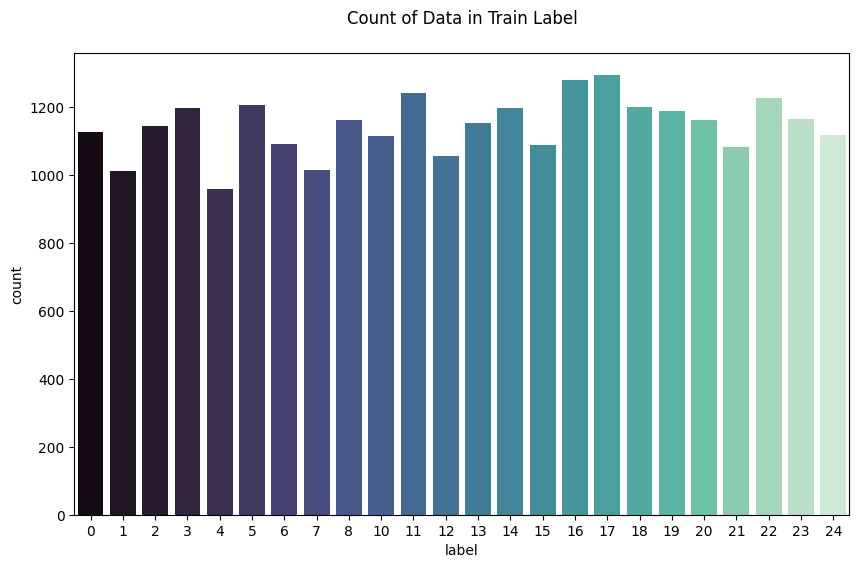

In [ ]:
plt.figure(figsize = (10,6))
plt.title("Count of Data in Train Label\n", size = 12)

sns.countplot(x = train_label, palette='mako');

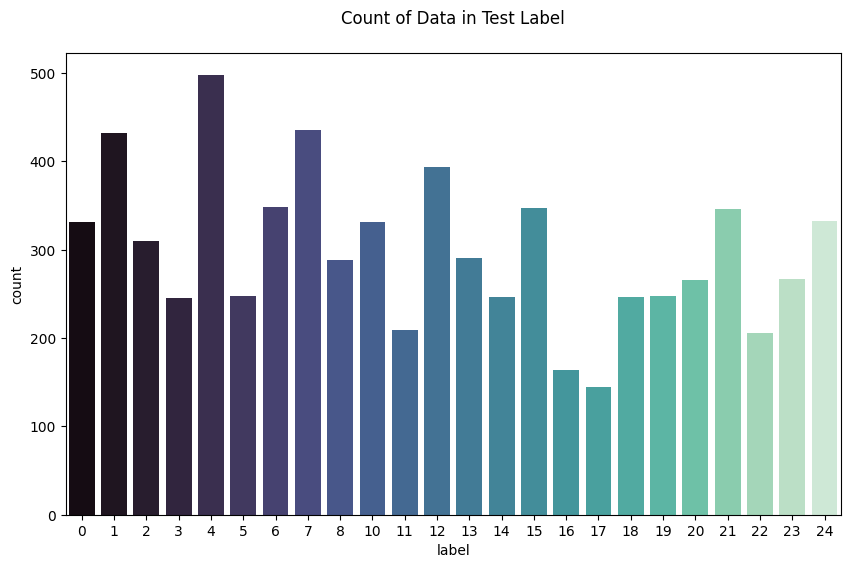

In [ ]:
plt.figure(figsize = (10,6))
plt.title("Count of Data in Test Label\n", size = 12)

sns.countplot(x = test_label, palette='mako');

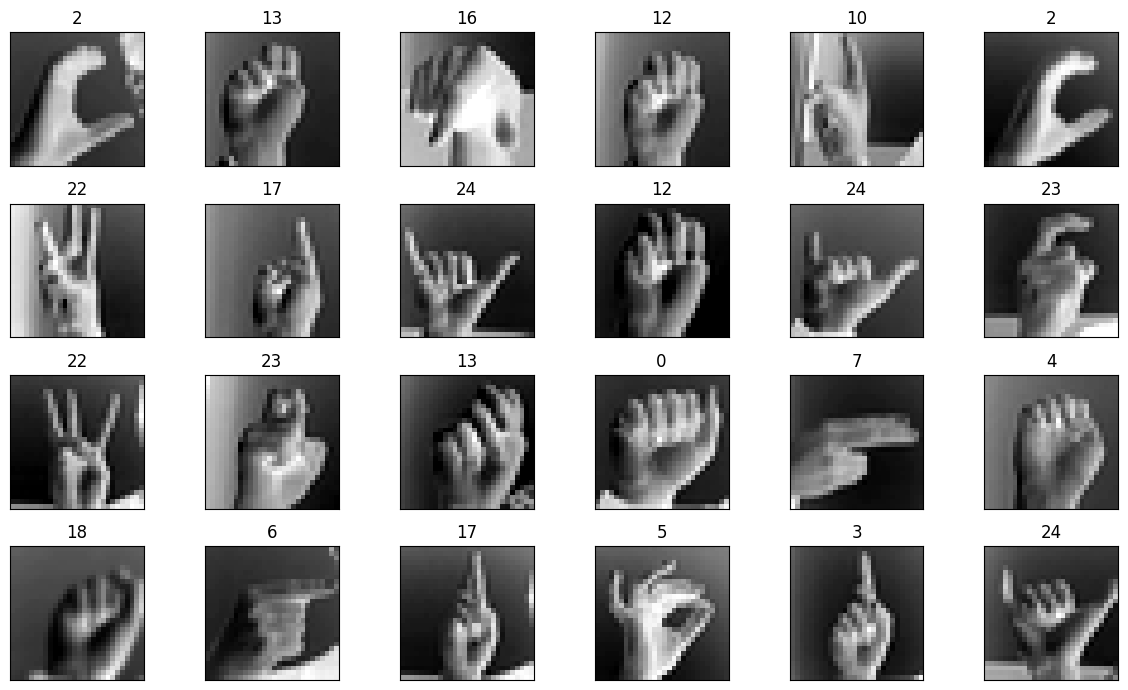

In [ ]:
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(12, 7))

for item in zip(axes.ravel(), X_train[index], train_label[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

Converting the integer labels to binary form

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)

In [ ]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
X_test=X_test.values.reshape(-1,28,28,1)
X_test.shape

(7172, 28, 28, 1)

### Data Splitting

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


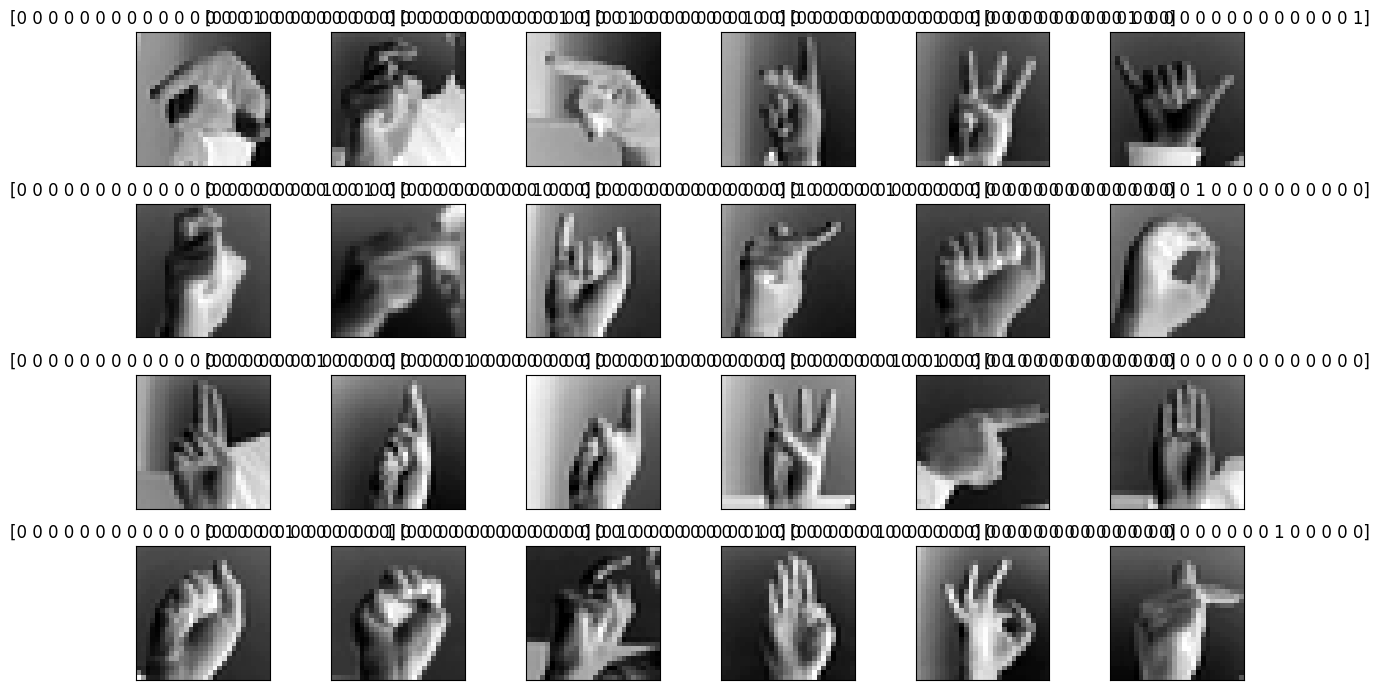

In [ ]:
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(12, 7))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

Normalizing the Image Data

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train[0]

array([[[0.41960784],
        [0.4627451 ],
        [0.49803922],
        [0.5254902 ],
        [0.54509804],
        [0.56078431],
        [0.57254902],
        [0.58823529],
        [0.6       ],
        [0.61176471],
        [0.61960784],
        [0.62745098],
        [0.63921569],
        [0.64705882],
        [0.62352941],
        [0.65098039],
        [0.65882353],
        [0.66666667],
        [0.66666667],
        [0.67058824],
        [0.67058824],
        [0.67058824],
        [0.6745098 ],
        [0.67058824],
        [0.67058824],
        [0.66666667],
        [0.66666667],
        [0.6627451 ]],

       [[0.43529412],
        [0.4745098 ],
        [0.50588235],
        [0.52941176],
        [0.55294118],
        [0.56470588],
        [0.58039216],
        [0.59215686],
        [0.60392157],
        [0.61568627],
        [0.62745098],
        [0.63921569],
        [0.64313725],
        [0.66666667],
        [0.46666667],
        [0.59607843],
        [0.67058824],
        

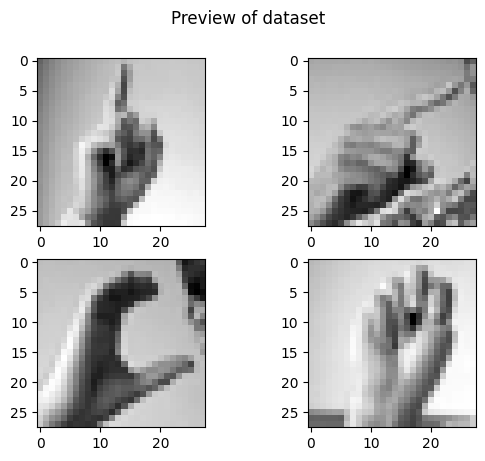

In [ ]:
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(X_train[0].reshape(28,28),cmap='gray')
axe[0,1].imshow(X_train[1].reshape(28,28),cmap='gray')
axe[1,0].imshow(X_train[2].reshape(28,28),cmap='gray')
axe[1,1].imshow(X_train[4].reshape(28,28),cmap='gray')

# Model 1 - Convolutional Neural Network

## Build Phase

In [ ]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),2,padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),2,padding='same'))

model.add(Flatten())

In [ ]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          8224      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 32)          0

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

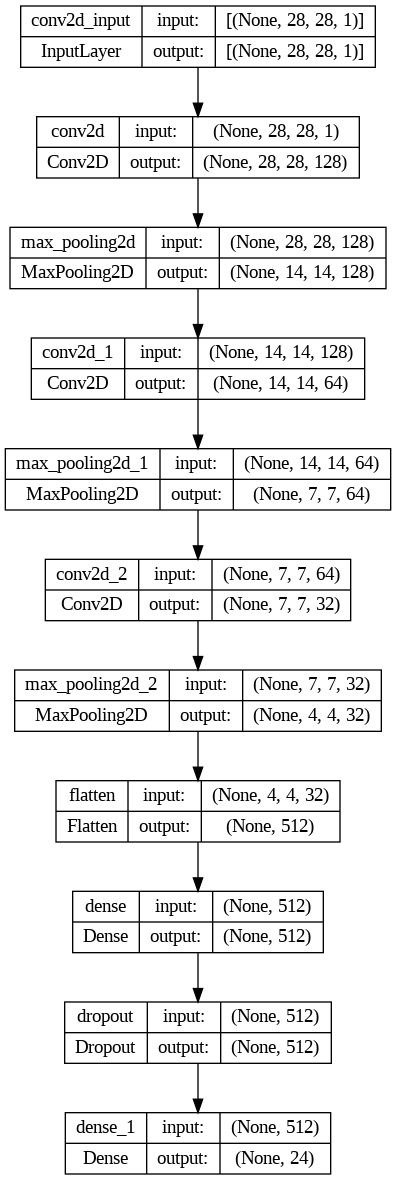

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')  # display resulting image in notebook

## Training

In [ ]:
cnn_model = model.fit(X_train,y_train,batch_size=200,epochs = 35,validation_split=0.2)

Epoch 1/35
110/110 [==============================] - 13s 18ms/step - loss: 2.1078 - accuracy: 0.3598 - val_loss: 0.7517 - val_accuracy: 0.7627
Epoch 2/35
110/110 [==============================] - 1s 13ms/step - loss: 0.5167 - accuracy: 0.8250 - val_loss: 0.2132 - val_accuracy: 0.9381
Epoch 3/35
110/110 [==============================] - 1s 12ms/step - loss: 0.1876 - accuracy: 0.9419 - val_loss: 0.0583 - val_accuracy: 0.9925
Epoch 4/35
110/110 [==============================] - 1s 13ms/step - loss: 0.0734 - accuracy: 0.9803 - val_loss: 0.0194 - val_accuracy: 0.9989
Epoch 5/35
110/110 [==============================] - 1s 12ms/step - loss: 0.0324 - accuracy: 0.9931 - val_loss: 0.0135 - val_accuracy: 0.9984
Epoch 6/35
110/110 [==============================] - 1s 13ms/step - loss: 0.0207 - accuracy: 0.9956 - val_loss: 0.0050 - val_accuracy: 0.9996
Epoch 7/35
110/110 [==============================] - 2s 14ms/step - loss: 0.0169 - accuracy: 0.9962 - val_loss: 0.0070 - val_accuracy: 0.999

## CNN Evaluation and Results

In [ ]:
(loss,acc)=model.evaluate(x=X_test,y=y_test)

225/225 [==============================] - 1s 4ms/step - loss: 0.4970 - accuracy: 0.9243


In [ ]:
print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 92.42889285087585
The Loss of the model for testing data is: 0.4970296025276184


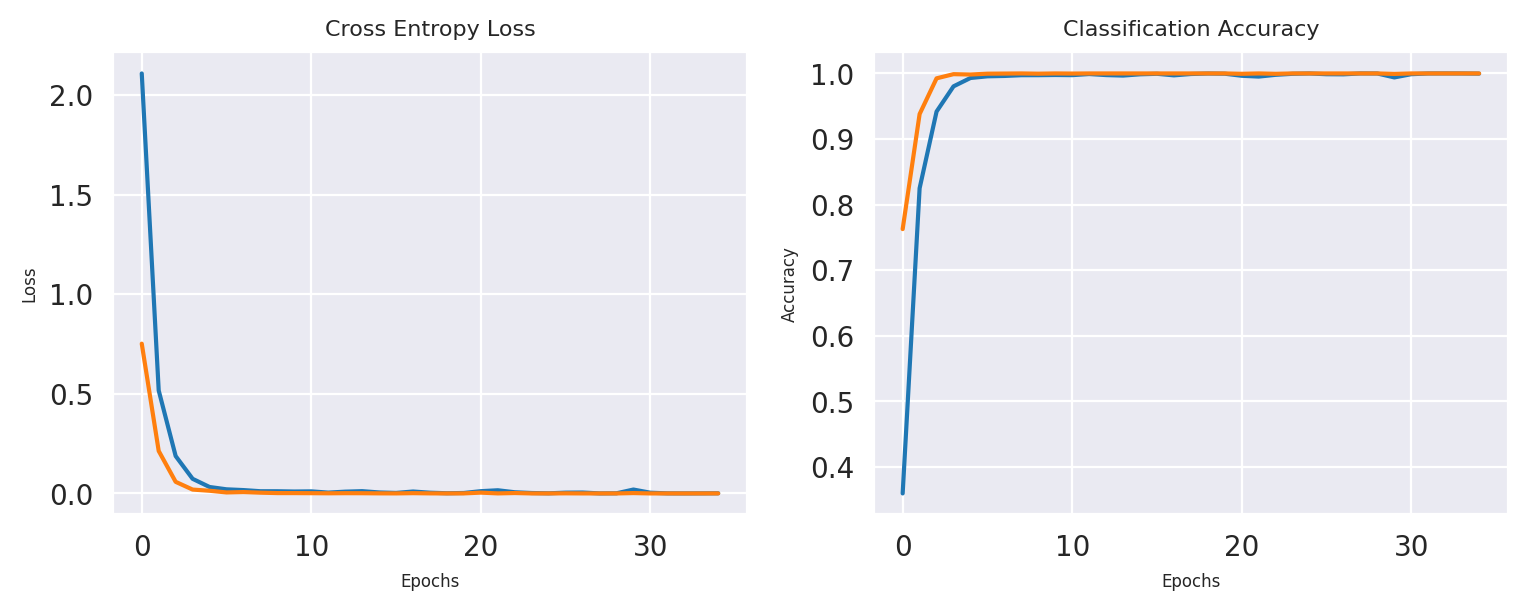

In [ ]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(cnn_model.history)

plt.figure(figsize=(9,3),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=8)
plt.xlabel('Epochs',fontsize=6)
plt.ylabel('Loss',fontsize=6)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=8)
plt.xlabel('Epochs',fontsize=6)
plt.ylabel('Accuracy',fontsize=6)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

## Tuning

Tuning the CNN Model

In [ ]:
# Let's increase the number of epochs

cnn_model2 = model.fit(X_train,y_train,batch_size=200,epochs = 48,validation_split=0.2)

Epoch 1/48
110/110 [==============================] - 2s 14ms/step - loss: 0.0120 - accuracy: 0.9960 - val_loss: 0.0260 - val_accuracy: 0.9918
Epoch 2/48
110/110 [==============================] - 1s 13ms/step - loss: 0.0210 - accuracy: 0.9930 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 3/48
110/110 [==============================] - 2s 16ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 3.2531e-05 - val_accuracy: 1.0000
Epoch 4/48
110/110 [==============================] - 2s 14ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 2.1435e-05 - val_accuracy: 1.0000
Epoch 5/48
110/110 [==============================] - 1s 13ms/step - loss: 2.9610e-04 - accuracy: 0.9999 - val_loss: 7.2542e-06 - val_accuracy: 1.0000
Epoch 6/48
110/110 [==============================] - 1s 13ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0019 - val_accuracy: 0.9993
Epoch 7/48
110/110 [==============================] - 1s 13ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 3.6959e-05 - 

In [ ]:
#cnn_model2 evaluation and results

(loss2,acc2)=model.evaluate(x=X_test,y=y_test)

225/225 [==============================] - 1s 3ms/step - loss: 0.4784 - accuracy: 0.9335


In [ ]:
print('The accuracy of the model for testing data is:',acc2*100)
print('The Loss of the model for testing data is:',loss2)

The accuracy of the model for testing data is: 93.34913492202759
The Loss of the model for testing data is: 0.4784312844276428


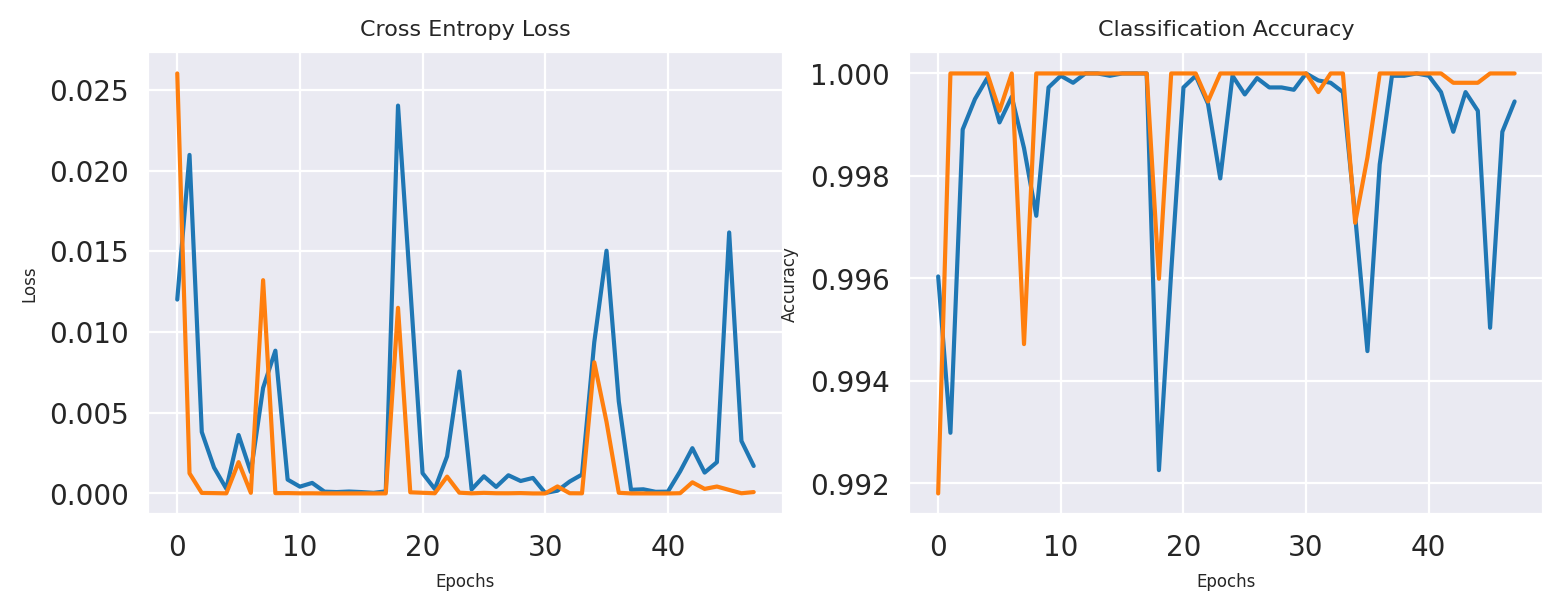

In [ ]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(cnn_model2.history)

plt.figure(figsize=(9,3),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=8)
plt.xlabel('Epochs',fontsize=6)
plt.ylabel('Loss',fontsize=6)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=8)
plt.xlabel('Epochs',fontsize=6)
plt.ylabel('Accuracy',fontsize=6)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

In [ ]:
predictions = model.predict(X_test)

225/225 [==============================] - 1s 5ms/step


# Model 2 - Support Vector Classification
## Build Phase

In [ ]:
# We can't use dropna() on numpy arrays, here is a hack
nan_rows_train = np.any(np.isnan(X_train.reshape(X_train.shape[0], -1)), axis=1)
nan_rows_test = np.any(np.isnan(X_test.reshape(X_test.shape[0], -1)), axis=1)


X_train_clean = X_train[~nan_rows_train]
y_train_clean = y_train[~nan_rows_train]

X_test_clean = X_test[~nan_rows_test]
y_test_clean = y_test[~nan_rows_test]


X_train_flatten = X_train_clean.reshape(X_train_clean.shape[0], -1)
X_test_flatten = X_test_clean.reshape(X_test_clean.shape[0], -1)

# Dimensionality issues
y_train_single_labels = np.argmax(y_train_clean, axis=1) if y_train_clean.ndim > 1 else y_train_clean
y_test_single_labels = np.argmax(y_test_clean, axis=1) if y_test_clean.ndim > 1 else y_test_clean

In [ ]:
X_train_flatten = X_train_flatten / 255.0
X_test_flatten = X_test_flatten / 255.0

In [ ]:
svc_model = SVC(kernel='rbf', random_state=31)

In [ ]:
cross_val_scores = cross_val_score(svc_model, X_train_flatten, y_train_single_labels, cv=3, n_jobs = -1)

print(f"Cross-Validation Accuracy Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Score: {np.mean(cross_val_scores)}")


Cross-Validation Accuracy Scores: [0.99912587 0.99989073 0.99989072]
Mean Cross-Validation Score: 0.9996357769056791


In [ ]:
svc_model.fit(X_train_flatten, y_train_single_labels)

SVC(random_state=31)

In [ ]:
svc_preds = svc_model.predict(X_test_flatten)

In [ ]:
svc_accuracy = accuracy_score(y_test_single_labels, svc_preds)
print(f"SVC Model Accuracy: {svc_accuracy}")

SVC Model Accuracy: 0.8418851087562744


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_single_labels, svc_preds))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       331
           1       1.00      0.99      0.99       432
           2       0.88      0.99      0.93       310
           3       0.92      1.00      0.95       245
           4       0.94      0.99      0.97       498
           5       0.78      0.83      0.80       247
           6       0.93      0.93      0.93       348
           7       0.98      0.94      0.96       436
           8       0.80      0.90      0.85       288
           9       0.79      0.59      0.67       331
          10       0.87      1.00      0.93       209
          11       0.85      0.75      0.79       394
          12       0.90      0.68      0.78       291
          13       0.99      0.83      0.90       246
          14       1.00      1.00      1.00       347
          15       1.00      0.99      0.99       164
          16       0.28      0.54      0.37       144
          17       0.71    

In [ ]:
# Converting one-hot encoded labels to single-label format
y_train_single_labels = np.argmax(y_train_clean, axis=1) if y_train_clean.ndim > 1 else y_train_clean

# Splitting the dataset into training and validation sets
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train_flatten, y_train_single_labels, test_size=0.2, random_state=31)

# Fitting the model
svc_model.fit(X_train_val, y_train_val)

# Making predictions on the validation set
val_preds = svc_model.predict(X_val)

# Calculating the accuracy of the model on the validation set
val_accuracy = accuracy_score(y_val, val_preds)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.9996357676197414


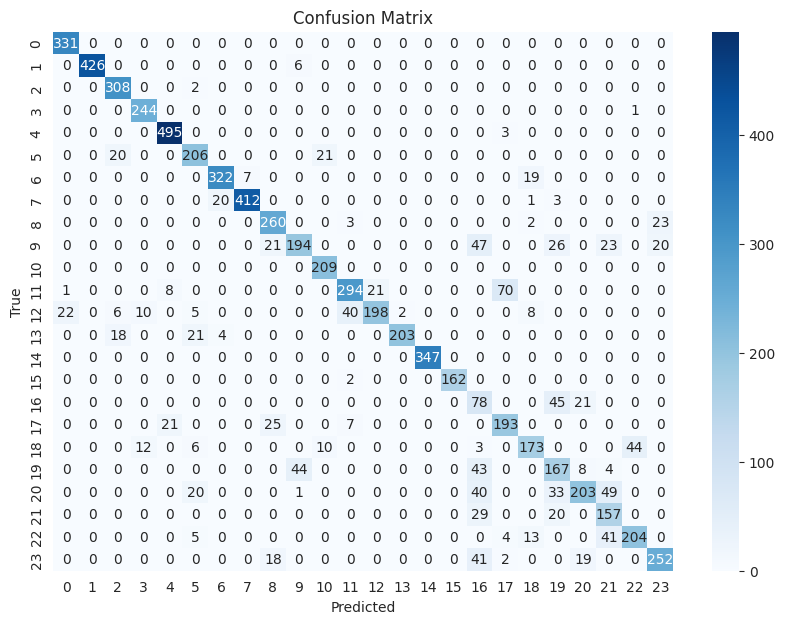

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_single_labels, svc_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1)

    plt.figure()
    plt.plot(train_sizes, np.mean(train_scores, axis=1),
             'o-', color="r", label="Training score")
    plt.plot(train_sizes, np.mean(test_scores, axis=1),
             'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.title('Learning Curve')
    plt.show()

plot_learning_curve(svc_model, X_train_flatten, y_train_single_labels)

## Tuning

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_flatten)
X_test_imputed = imputer.transform(X_test_flatten)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [ ]:
cv = StratifiedKFold(n_splits = 5)

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'rbf']
}

In [ ]:
grid_search = GridSearchCV(svc_model, param_grid, cv=cv)

In [ ]:
grid_search.fit(X_train_scaled, y_train_clean)

In [ ]:
best_svc = grid_search.best_estimator_

In [ ]:
best_svc

In [ ]:
best_svc.fit(X_train_scaled, y_train_clean)

In [ ]:
y_pred_svc = best_svc.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test_single_labels, y_pred_svc)

In [ ]:
print(f'Accuracy: {accuracy}')

# Model Comparison